Import Libraries & Dataset

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve,auc

In [99]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

Exploratory Data Analysis (EDA)

In [100]:
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nDtypes:")
print(df.dtypes)

print("\nHead:")
display(df.head(3))

print("\nMissing values per column:")
print(df.isna().sum())

print("\nTarget distribution (Churn):")
print(df["Churn"].value_counts())


Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Dtypes:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Head:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes



Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Target distribution (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [101]:
# Checking duplicated data
df.duplicated().any()

np.False_

In [102]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


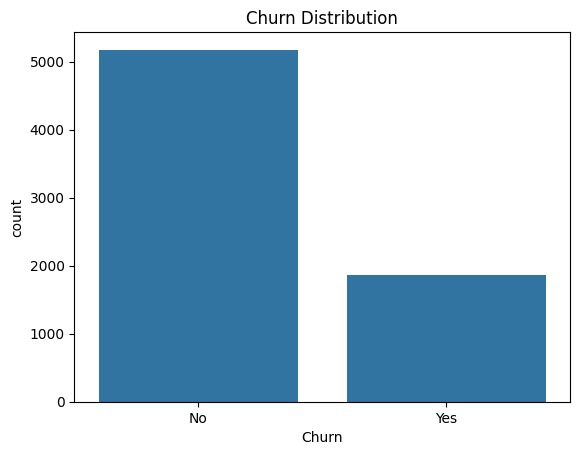

In [103]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [104]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [105]:
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [106]:
# Fill missing values (due to coercion) with median
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [107]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [108]:
df.shape

(7043, 21)

In [109]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [110]:
print("\nTarget distribution (Churn):")
print(df["Churn"].value_counts())


Target distribution (Churn):
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [111]:
# Grouping Categorical and Numerical Columns
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [112]:
def hist_boxplot(df, cols):
    # Create a subplot with 2 rows (histogram, boxplot) and len(cols) columns
    fig, axes = plt.subplots(2, len(cols), figsize=(5 * len(cols), 8))

    for i, col in enumerate(cols):
        # Plot histogram with #9EBC8A
        sns.histplot(
            data=df, x=col, ax=axes[0, i], kde=True, color="#44A279"
        )
        axes[0, i].set_title(f'Histogram of {col}', color="#093321")
        
        # Plot boxplot with #73946B
        sns.boxplot(
            data=df, x=col, ax=axes[1, i], color='#44A279'
        )
        axes[1, i].set_title(f'Boxplot of {col}', color='#093321')

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

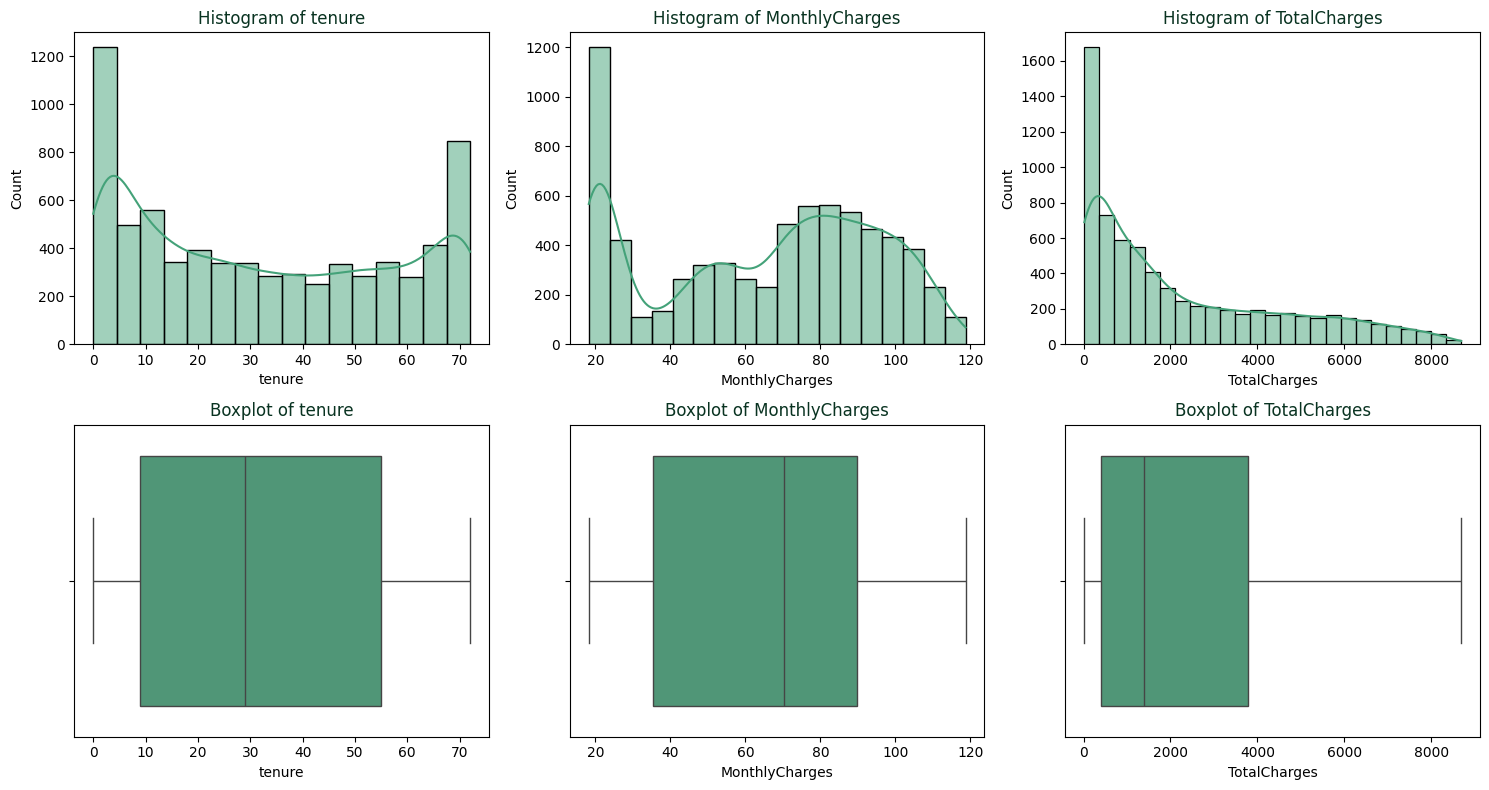

In [113]:
hist_boxplot(df, num_cols)

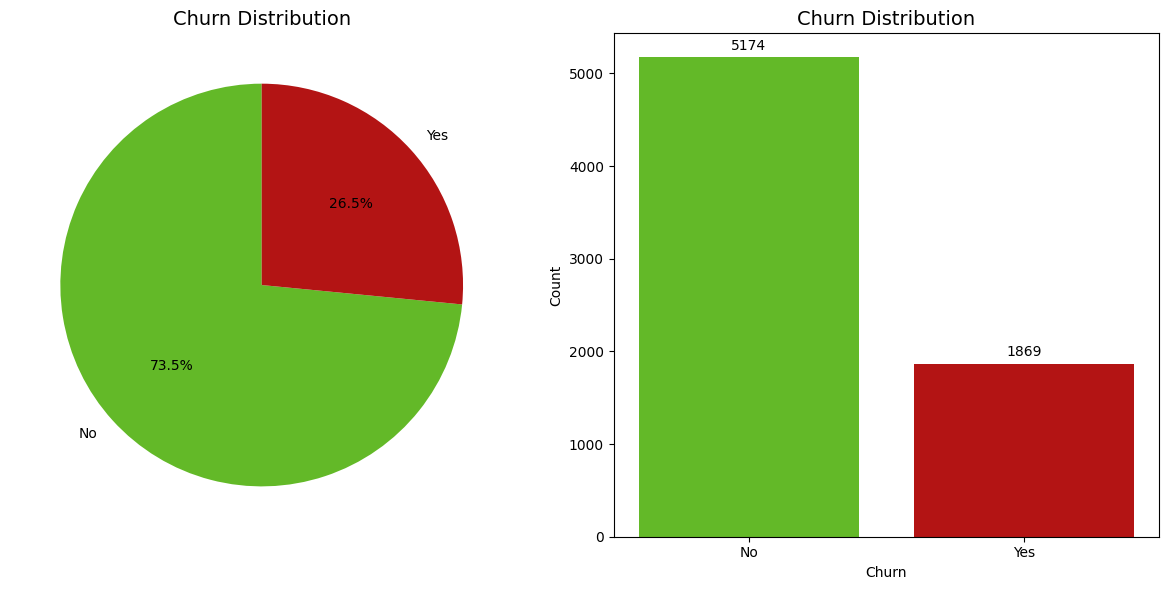

: 

In [ ]:
churn_counts = df['Churn'].value_counts()

# Colors mapping
colors = {'Yes': "#B31414", 'No': "#58B519EF"}

# Create subplot (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart 
axes[0].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors[label] for label in churn_counts.index]
)
axes[0].set_title('Churn Distribution', fontsize=14)

# Bar chart 
bars = axes[1].bar(
    churn_counts.index,
    churn_counts.values,
    color=[colors[label] for label in churn_counts.index]
)

# Add numeric labels on top of bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2, 
        height + (0.01 * max(churn_counts.values)),  # a bit above the bar
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

axes[1].set_title('Churn Distribution', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Churn')

# Adjust layout
plt.tight_layout()
plt.show()


In [114]:
def pie_chart(df, columns, autopct='%1.1f%%'):
    # Define custom palette
    custom_palette = ["#73C8CE", "#D3528E", "#A3B844", '#F8ED8C', '#F9C784', '#FCAF58', '#F98948']
    
    num_cols = 3  # number of charts per row
    num_rows = int(np.ceil(len(columns) / num_cols))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()
        
        # Repeat colors if number of categories exceeds palette length
        colors = (custom_palette * ((len(value_counts) // len(custom_palette)) + 1))[:len(value_counts)]
        
        axes[i].pie(
            value_counts,
            labels=value_counts.index,
            autopct=autopct,
            startangle=90,
            colors=colors
        )
        axes[i].set_title(f"Distribution of {column}", fontsize=12)
        axes[i].axis('equal')
    
    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

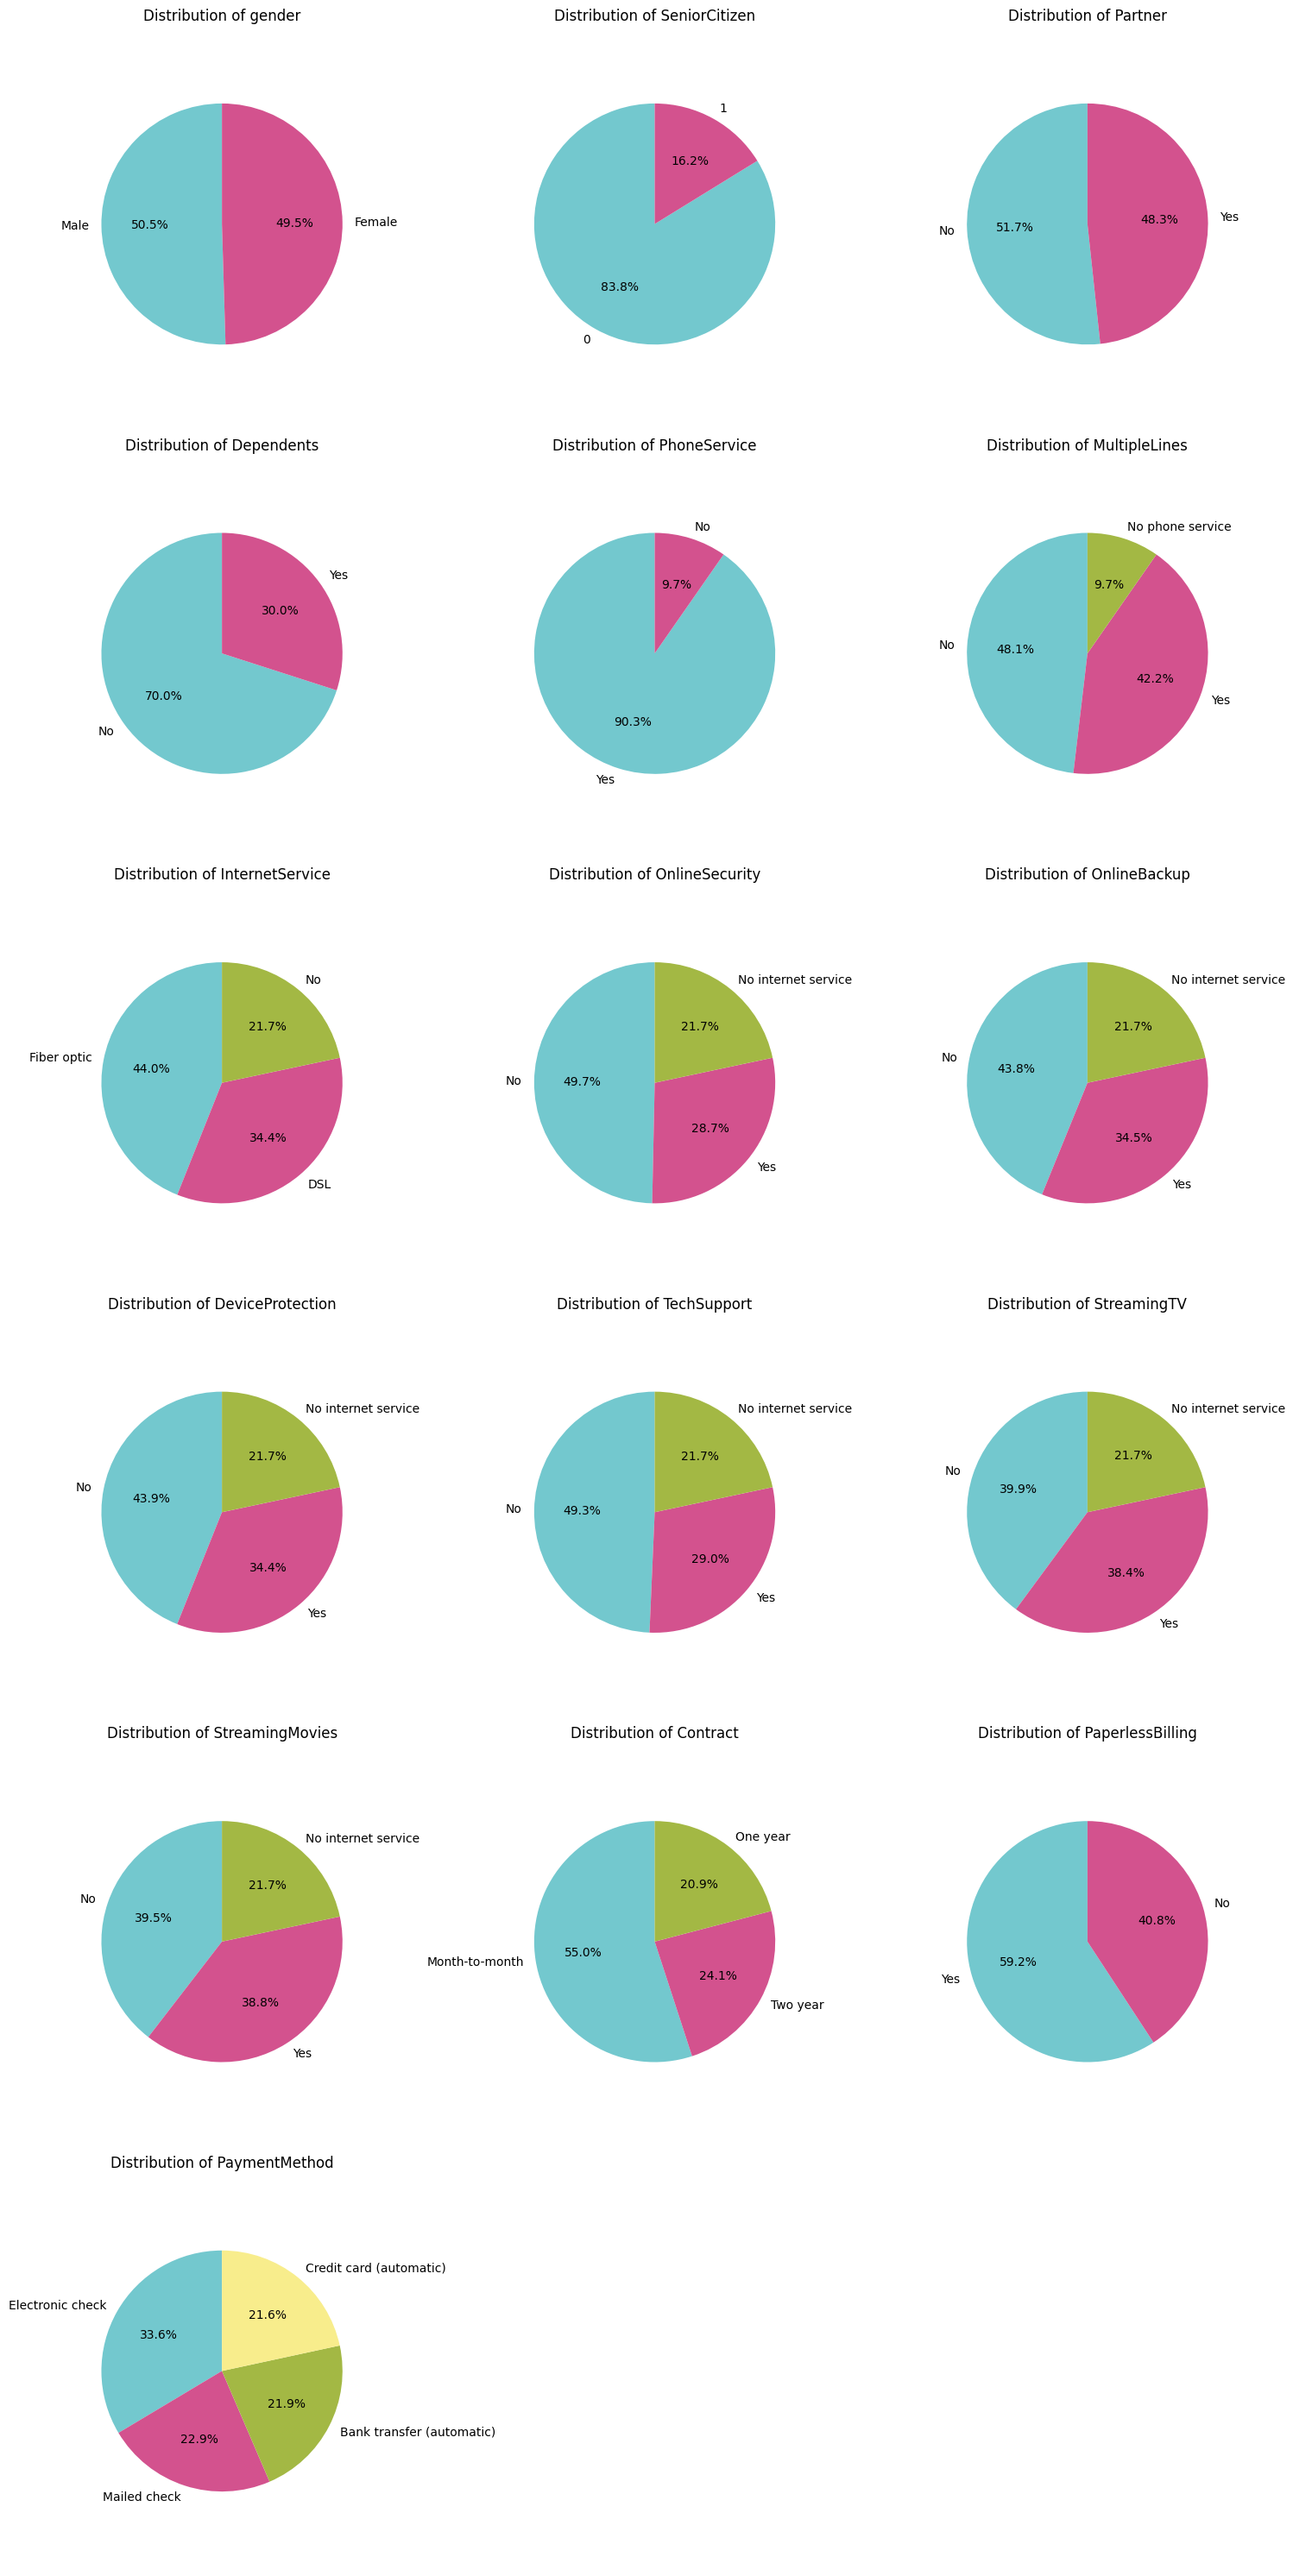

In [115]:
pie_chart(df, cat_cols)

In [116]:
def displot(df, features, feature1='Churn'):
    n_features = len(features)
    ncols = 1
    nrows = (n_features + 1) // 1
    
    plt.figure(figsize=(12, 5*nrows))
    

    palette = {
        'Yes': "#de3b3bad",    # Not Churn
        'No' : "#64AF32B1"    # Churn
    }
    
    for i, feature2 in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        
        for cls in df[feature1].unique():
            subset = df[df[feature1] == cls]
            sns.kdeplot(subset[feature2], 
                        shade=True, 
                        alpha=0.5, 
                        color=palette[cls], 
                        label='Churn' if cls == 'Yes' else 'Not Churn')
        
        plt.title(f'{feature2} vs {feature1}')
        plt.xlabel(feature2)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

C:\Users\Saqib Malik\AppData\Local\Temp\ipykernel_8876\1136329436.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[feature2],
C:\Users\Saqib Malik\AppData\Local\Temp\ipykernel_8876\1136329436.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[feature2],
C:\Users\Saqib Malik\AppData\Local\Temp\ipykernel_8876\1136329436.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[feature2],
C:\Users\Saqib Malik\AppData\Local\Temp\ipykernel_8876\1136329436.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update 

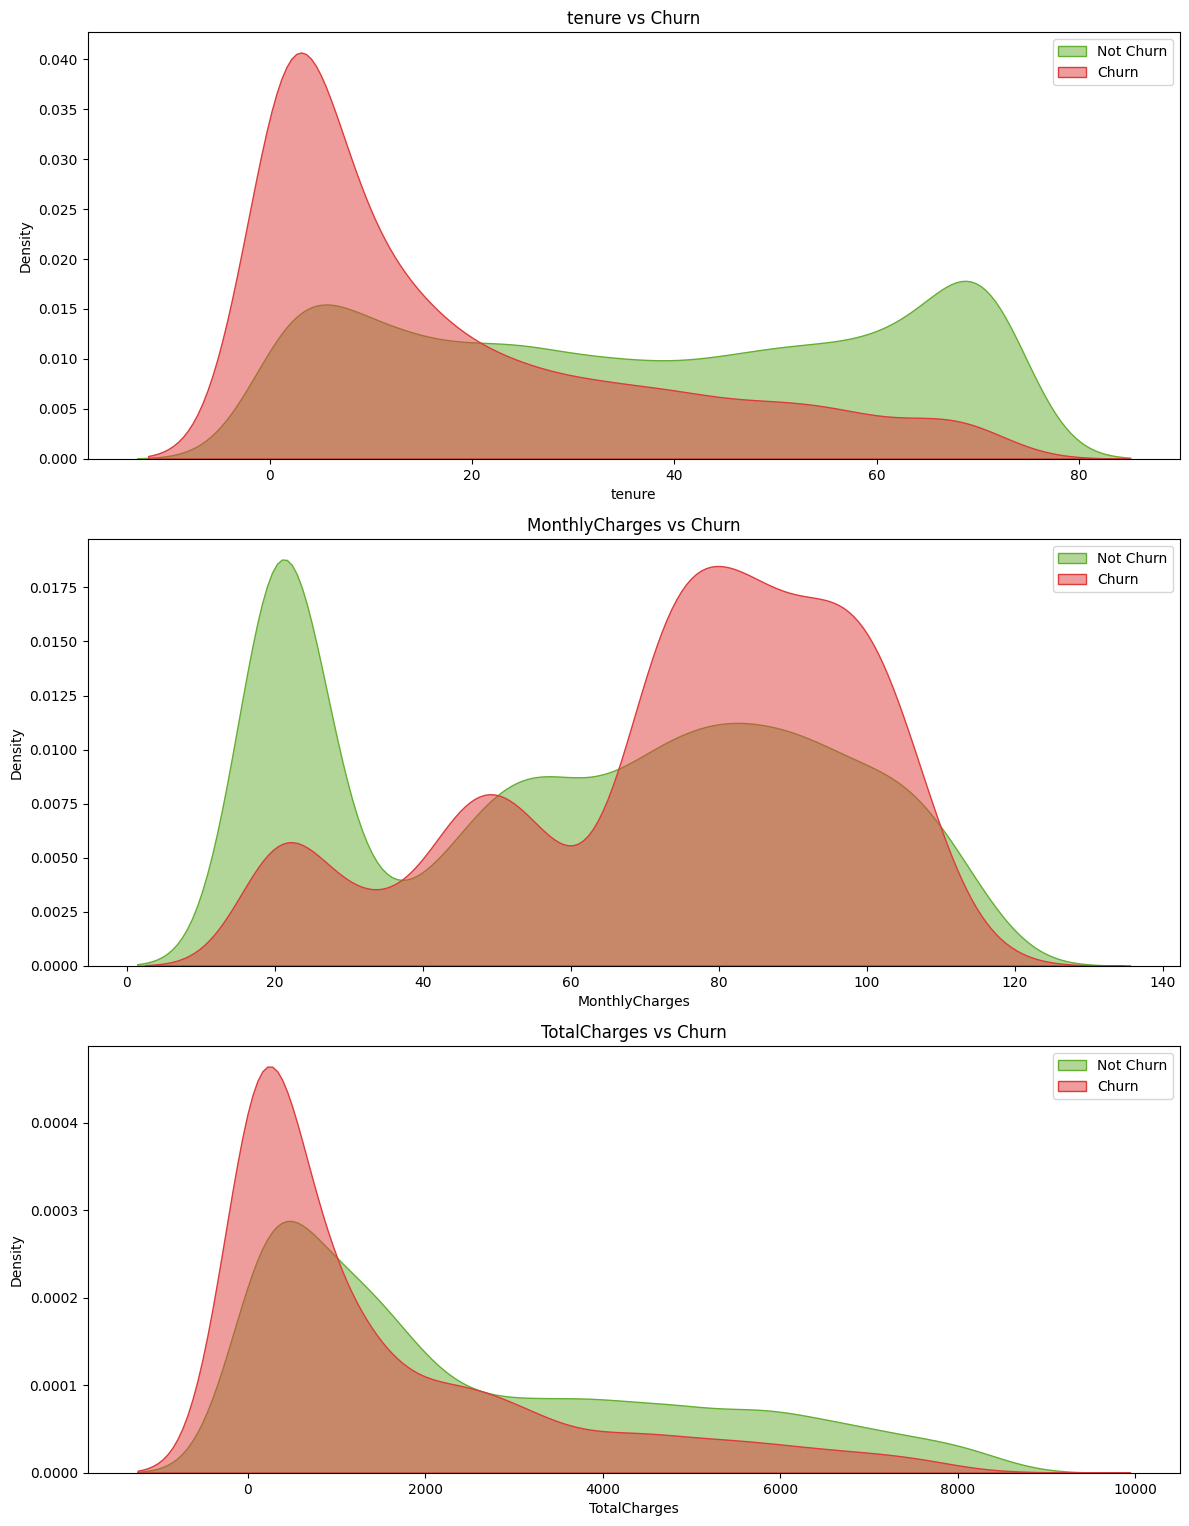

In [117]:
displot(df, num_cols)

In [118]:
# Drop customerID since it's just an identifier
df_encoded = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric in case there are spaces
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Identify categorical columns (dtype == object)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now df_encoded is fully numeric and ready for correlation
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Correlation Analysis

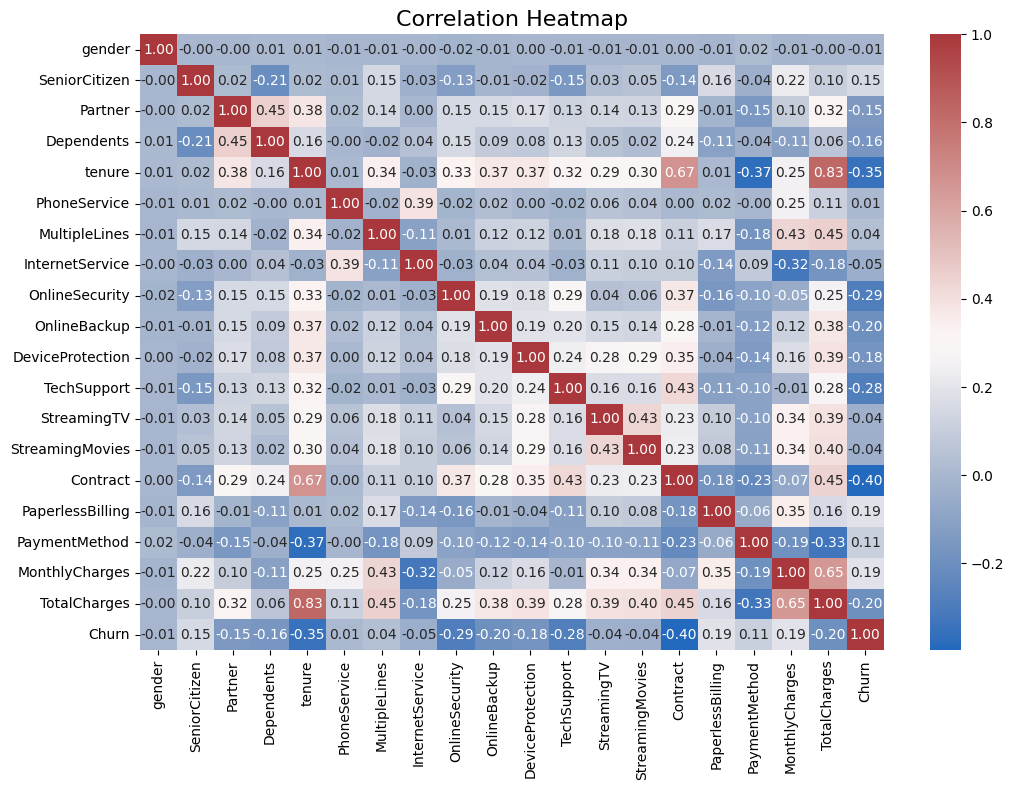

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Feature Encoding

In [123]:
df_cust = df.copy()

In [124]:
# Drop 'customerID' because it's not a feature but a unique ID
df_cust = df_cust.drop(columns=['customerID'])

In [125]:
# Encode target 'Churn' into 0/1
df_cust['Churn'] = df_cust['Churn'].map({'No': 0, 'Yes': 1})

In [126]:
# Binary categorical columns — use LabelEncoder
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']
for col in binary_cols:
    # SeniorCitizen is already 0/1 but check for consistency
    if df_cust[col].dtype == 'object':
        df_cust[col] = LabelEncoder().fit_transform(df_cust[col])

In [127]:
# Multi-category categorical columns — use One-Hot Encoding
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# Apply One-Hot Encoding, drop_first=True to avoid dummy variable trap
df_cust = pd.get_dummies(df_cust, columns=multi_cat_cols, drop_first=True)

In [134]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

Feature Scaling

In [128]:
# Numerical columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [129]:
# Scale numerical features using StandardScaler (mean=0, std=1)
scaler = StandardScaler()
df_cust[num_cols] = scaler.fit_transform(df_cust[num_cols])

df_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173244,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,-0.746535,-0.194766,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,0.197365,-0.940470,1,...,False,False,False,False,False,False,False,False,True,False


Feature Importance

In [159]:
# Feature importance
importances = rf.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

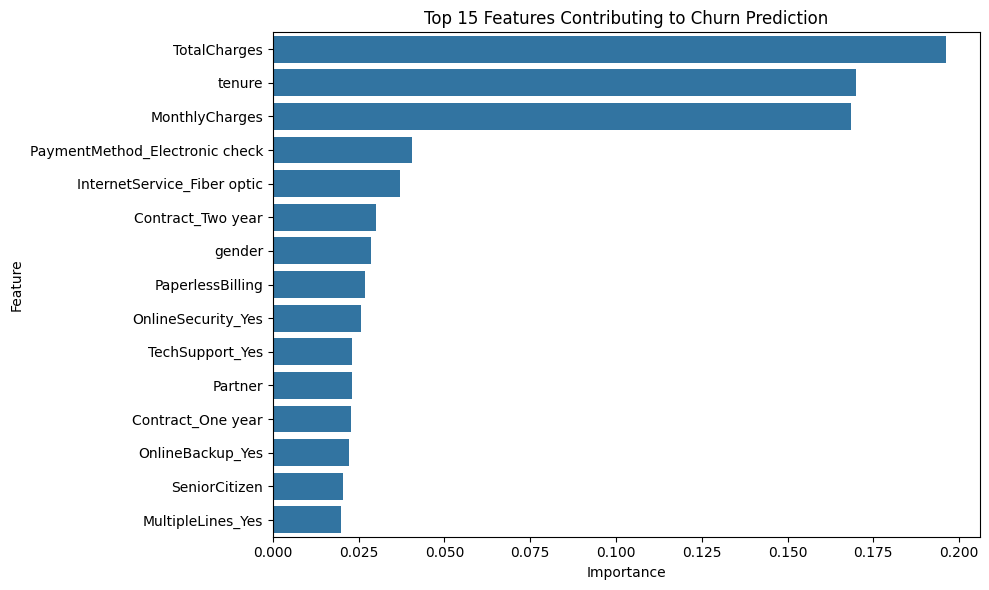

In [160]:
# Plot top 15 important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top 15 Features Contributing to Churn Prediction')
plt.tight_layout()
plt.show()

Data Splitting & Modelling

In [130]:
#Feature and target
X = df_cust.drop(columns=['Churn'])
y = df_cust['Churn']

# Split data: 80% train, 20% test, stratify to keep churn ratio consistent
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Logistic Regression Accuracy: 0.8048261178140526
Classification Report (Logistic Regression) :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Confusion Matrix:


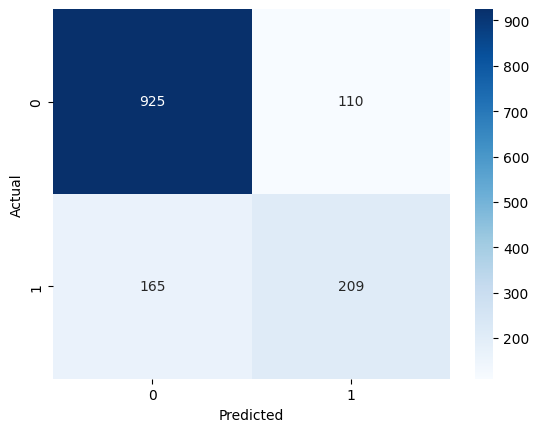

In [149]:
# create the model
log_reg = LogisticRegression(max_iter=1000)

# train the model
log_reg.fit(X_train, y_train)

# evaluate on test set
y_pred_logR = log_reg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logR))
print("Classification Report (Logistic Regression) :\n", classification_report(y_test, y_pred_logR))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_logR), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.7416607523066004
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

Confusion Matrix:


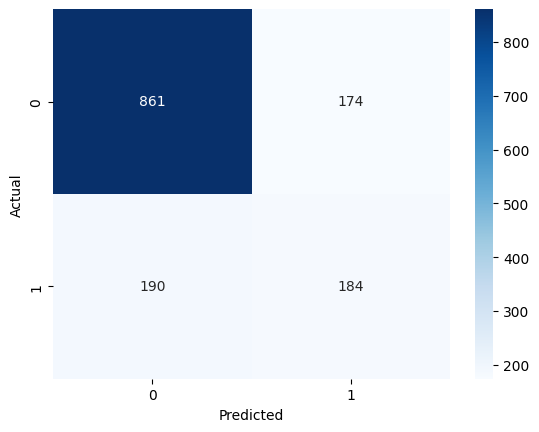

In [152]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.7863733144073811
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Confusion Matrix:


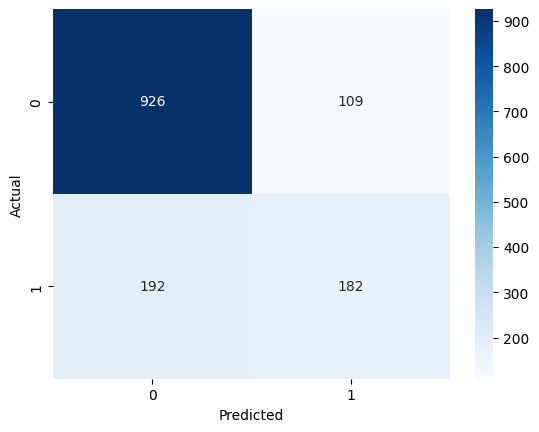

In [154]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train model
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

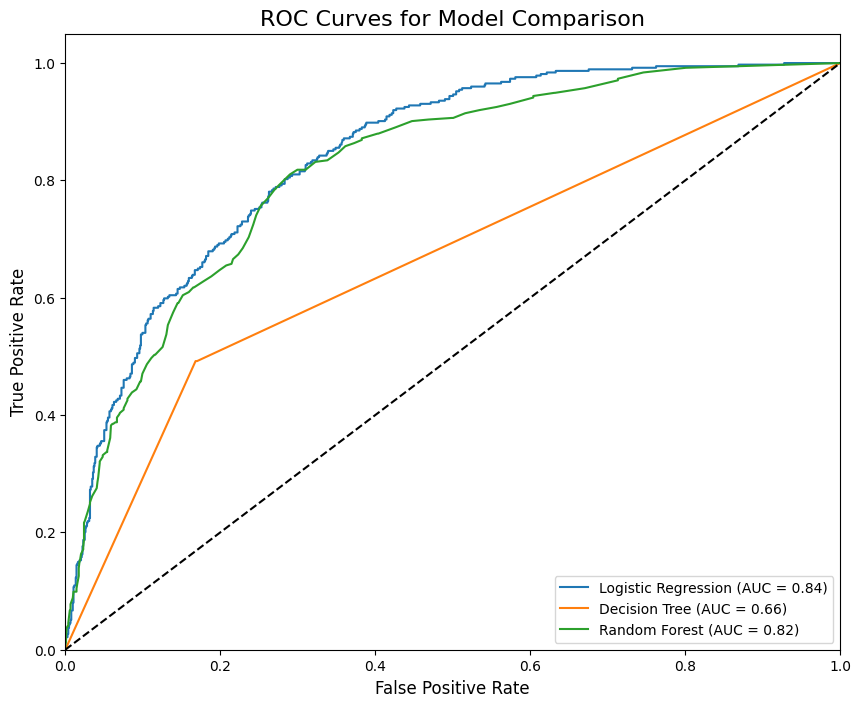

In [166]:
# Step 4: Plot ROC Curves (assuming binary classification)
plt.figure(figsize=(10, 8))
for model, name in [(log_reg, 'Logistic Regression'), 
                    (dt, 'Decision Tree'),
                    (rf, 'Random Forest')]: 
    # Get predicted probabilities for positive class
    if hasattr(model, "predict_proba"):  # Check if model supports predict_proba
        y_score = model.predict_proba(X_test)[:, 1]  # Probability for positive class
    else:  # For models like LogisticRegression with decision_function
        y_score = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Model Comparison', fontsize=16)
plt.legend(loc="lower right")
plt.show()